In [2]:
using LinearAlgebra, IterativeSolvers
using Plots
using BenchmarkTools
include("symTriSysSolverExp.jl")

solver4seqTxbexp (generic function with 1 method)

In [15]:
n = 1000;
T = Tridiagonal(-ones(n-1), 2ones(n), -ones(n-1));
x = rand(n);
b = rand(n);

norm(solverTxbexp(T,b)-T\b)

2.8932951859496363e-7

In [7]:
# initially_zero = false
# abstol = 10^-10
# reltol = 10^-10
# maxiter = 4396
# verbose = true
# log = true


In [53]:
cg!(x, T, b; initially_zero=false, abstol=10^-10, maxiter=4396, verbose=true, log=true)

LoadError: MethodError: no method matching similar(::Int64)
[0mClosest candidates are:
[0m  similar([91m::Union{Adjoint{T, var"#s859"}, Transpose{T, var"#s859"}} where {T, var"#s859"<:(AbstractVector)}[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/adjtrans.jl:205
[0m  similar([91m::Union{Adjoint{T, var"#s859"}, Transpose{T, var"#s859"}} where {T, var"#s859"<:(AbstractVector)}[39m, [91m::Type{T}[39m) where T at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/adjtrans.jl:206
[0m  similar([91m::Union{Adjoint{T, S}, Transpose{T, S}} where {T, S}[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/adjtrans.jl:209
[0m  ...

In [9]:
@time xx = cg!(x, T, b; initially_zero=false, abstol=10^-13, maxiter=4396, verbose=true, log=false);
@time xx = T\b;

  1	1.50e-07
  2	4.38e-08
  3	1.15e-08
  4	3.04e-09
  5	8.10e-10
  6	2.16e-10
  7	5.94e-11
  8	1.57e-11
  9	4.04e-12
 10	1.09e-12
 11	2.89e-13
 12	7.63e-14

  0.003010 seconds (2.18 k allocations: 142.131 KiB, 87.72% compilation time)
  0.571129 seconds (3.31 M allocations: 168.319 MiB, 7.38% gc time, 99.98% compilation time)


In [ ]:

# initially_zero::Bool: If true assumes that iszero(x) so that one matrix-vector product can be saved when computing the initial residual vector;
# Pl = Identity(): left preconditioner of the method. Should be symmetric, positive-definite like A;
# abstol::Real = zero(real(eltype(b))), 

# reltol::Real = sqrt(eps(real(eltype(b)))): absolute and relative tolerance for the stopping condition |r_k| ≤ max(reltol * |r_0|, abstol), where r_k ≈ A * x_k - b is approximately the residual in the kth iteration.
# Note
# The true residual norm is never explicitly computed during the iterations for performance reasons; it may accumulate rounding errors.

# maxiter::Int = size(A,2): maximum number of iterations;
# verbose::Bool = false: print method information;
# log::Bool = false

In [14]:
norm(solverTxbexp(T,b) - T\b)

2.90749188005462e-7

In [24]:

t = 0.03;       
# 时间范围，计算到0.03秒
x = 1;          
# 空间范围，0-1米
m = 320;        
# 时间方向分320个格子
n = 64;         
# 空间方向分64个格子
ht = t/(m-1);   
# 时间步长dt
hx = x/(n-1);   
# 空间步长dx

u = zeros(m,n);

# 设置边界条件
i=2:n-1;
xx = [(i-1)*x/(n-1) for i in i]


u[1,2:n-1] = sin.(4*pi.*xx);
u[:,1] .= 0;
u[:,end] .= 0;

# %根据推导的差分公式计算
for i=1:m-1
    for j=2:n-1
        u[i+1,j] = ht*(u[i,j+1]+u[i,j-1]-2*u[i,j])/hx^2 + u[i,j];
    end
end



function meshgrid(x_range, y_range, yrow=true)
    x,y = [i for i in x_range], [j for j in y_range]
    # display(x)
    nx,ny = length(x), length(y)
    
    if yrow
        x_mesh = zeros(ny, nx)
        y_mesh = zero(x_mesh)
        for i in 1:ny
            x_mesh[i,:] = x
        end
        
        for j in 1:nx
            y_mesh[:,j] = y
        end
    end
    x_mesh, y_mesh
 
end

x_range = range(0, 1, length = n)
t_range = range(0, 0.03, length = m)
xx,tt = [i for i in x_range], [j for j in t_range]
nx,nt = length(xx), length(tt)

x_mesh, t_mesh = meshgrid(x_range,t_range)

display(size(x_mesh))
# %画出数值解
# [x,t] = meshgrid(0:x/(n-1):1,0:0.03/(m-1):0.03);
# mesh(x,t,u)

# %画出解析解

u1 = zero(u)
for i in 1:nt
    for j in 1:nx
        u1[i,j] = exp(-(4*pi)^2*tt[i])*sin(4*pi*xx[j])
    end
end

# u1 = exp(-(4*pi)^2*t).*sin(4*pi*x);
# figure;
# mesh(x,t,u1);

# %数值解与解析解的差
# figure;
# mesh(abs(u-u1));

(320, 64)

In [52]:
u_mat = copy(u)


T = Tridiagonal(-ones(n-1), 2ones(n), -ones(n-1));
for i=1:m-1
    u_mat[i+1,:] = ((ht/hx^2).*T+I)*u_mat[i,:]
end


display(u-u_mat)

LoadError: DimensionMismatch("A has first dimension 32, B has 64, C has 32 but all must match")

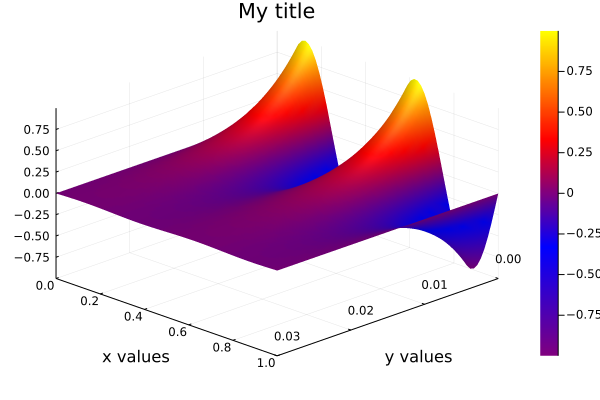

In [22]:
# plot(x_mesh, t_mesh, u)
gr()
# surface(x_range, t_range, u)
my_cg = cgrad([:purple, :blue, :red, :yellow])
fig_num_ij = plot(x_range,t_range,u,st=:surface,c=my_cg,camera=(45, 55),yflip = true,xlabel="x values", ylabel="y values",
title="My title", dpi=150,)
display(fig_num_ij)



gr()
# surface(x_range, t_range, u)
my_cg = cgrad([:purple, :blue, :red, :yellow])
fig_exct = plot(x_range,t_range,u1,st=:surface,c=my_cg,camera=(45, 55),yflip = true,xlabel="x values", ylabel="y values",
title="My title", dpi=150,fillalpha=0.75)
display(fig_exct)

gr()
# surface(x_range, t_range, u)
my_cg = cgrad([:purple, :blue, :red, :yellow])
fig_abserr = plot(x_range,t_range,abs.(u1-u),st=:surface,c=my_cg,camera=(45, 55),yflip = true,xlabel="x values", ylabel="y values",
title="My title", dpi=150,fillalpha=0.75)
display(fig_abserr)



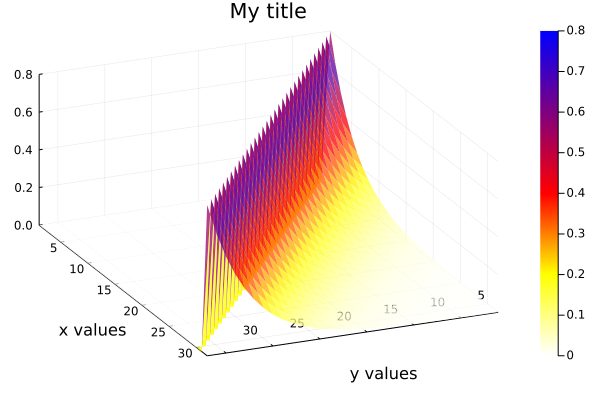

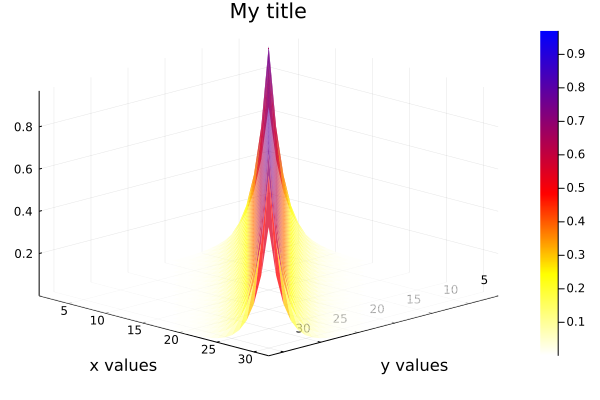

In [57]:
n = 32;
i_range = 1:n
j_range = 1:n
U = Bidiagonal(1.25ones(n), -1*ones(n-1), :U);
Uinv = inv(U)

gr()

my_cg = cgrad([:white, :yellow, :red, :purple, :blue])
fig_invU = plot(i_range,j_range,Uinv,st=:surface,c=my_cg,camera=(60, 60),yflip = true,xlabel="x values", ylabel="y values",
title="My title", dpi=150,fillalpha=0.75)
display(fig_invU)



n = 32;
i_range = 1:n
j_range = 1:n
T = Tridiagonal(-ones(n-1), 2.25ones(n), -ones(n-1));
Tinv = inv(T)

gr()

my_cg = cgrad([:white, :yellow, :red, :purple, :blue])
fig_invT = plot(i_range,j_range,Tinv,st=:surface,c=my_cg,camera=(45, 45),yflip = true,xlabel="x values", ylabel="y values",
title="My title", dpi=150,fillalpha=0.75)
display(fig_invT)

In [52]:
x_mesh

64×320 Matrix{Float64}:
 0.0        0.0        0.0        …  0.0        0.0        0.0
 0.015873   0.015873   0.015873      0.015873   0.015873   0.015873
 0.031746   0.031746   0.031746      0.031746   0.031746   0.031746
 0.047619   0.047619   0.047619      0.047619   0.047619   0.047619
 0.0634921  0.0634921  0.0634921     0.0634921  0.0634921  0.0634921
 0.0793651  0.0793651  0.0793651  …  0.0793651  0.0793651  0.0793651
 0.0952381  0.0952381  0.0952381     0.0952381  0.0952381  0.0952381
 0.111111   0.111111   0.111111      0.111111   0.111111   0.111111
 0.126984   0.126984   0.126984      0.126984   0.126984   0.126984
 0.142857   0.142857   0.142857      0.142857   0.142857   0.142857
 0.15873    0.15873    0.15873    …  0.15873    0.15873    0.15873
 0.174603   0.174603   0.174603      0.174603   0.174603   0.174603
 0.190476   0.190476   0.190476      0.190476   0.190476   0.190476
 ⋮                                ⋱                        
 0.825397   0.825397   0.825397    

In [53]:
t_mesh

64×320 Matrix{Float64}:
 0.0  9.40439e-5  0.000188088  0.000282132  …  0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132  …  0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132  …  0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 0.0  9.40439e-5  0.000188088  0.000282132     0.0298119  0.029906  0.03
 ⋮                         

In [62]:
for i in 1:2:5
    println(i)
    end

1
3
5


In [65]:
rand(3) + 1:2:5

LoadError: MethodError: no method matching +(::Vector{Float64}, ::Int64)
For element-wise addition, use broadcasting with dot syntax: array .+ scalar
[0mClosest candidates are:
[0m  +(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/operators.jl:655
[0m  +([91m::T[39m, ::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8} at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/base/int.jl:87
[0m  +([91m::UniformScaling[39m, ::Number) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/uniformscaling.jl:145
[0m  ...